In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
force1=pd.read_excel('ForceData_1.xlsx')

## ln (C1) + C2/RT

In [5]:
# Define the Zener-Hollomon flow stress curve equation
def zener_holloman(c1, c2,RT):
    #RT = temperature * 8.314  # assuming gas constant R = 8.314 J/(mol*K)
    return c1 * np.exp(c2 * RT)

# Define the objective function to minimize (using mean squared error)
def objective_function(coef,RT,measured_values):
    predicted_values = zener_holloman(coef[0], coef[1], RT)
    return np.mean((predicted_values - measured_values) ** 2)

#strain = force1['Strain']
#strain_rate = force1['Strain Rate']
RT= force1['1/RT']
measured_values = force1['Meas FS (ksi)']

# Initial guess for coefficients
#initial_guess = np.array([5684853.280812844,30600.773266375065,-0.14659341280912486,0.41966654801836967])
initial_guess = [1,1]


#5684853.280812844
#30600.773266375065
#-0.14659341280912486
#0.41966654801836967

# Bounds for coefficients
#bounds = [(10000, 200000000), (5000, 200000), (0, 1.1), (0, 1.1)]  

# Optimize the coefficients using scipy minimize function
result = minimize(objective_function, initial_guess, args=(RT, measured_values),tol=1e-10)

# Extract optimized coefficients
optimized_coefs = result.x

# Print optimized coefficients
print("Optimized coefficients:", optimized_coefs)

# Compute predicted values using optimized coefficients
predicted_values = zener_holloman(optimized_coefs[0], optimized_coefs[1], RT)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(measured_values, predicted_values))
print("RMSE:", rmse)

# Compute R^2
r2 = r2_score(measured_values, predicted_values)
print("R^2:", r2)


Optimized coefficients: [6.73674087e-01 4.29714063e+04]
RMSE: 9.257985007596892
R^2: 0.7841480651512535


## Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression

In [15]:
model=LinearRegression()
X=force1['Core Temp (F)'].to_numpy()
X=X.reshape((-1, 1))
y= force1['Meas FS (ksi)']
model.fit(X,y)

LinearRegression()

In [17]:
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.8921384834931282


In [18]:
print(f"intercept: {model.intercept_}")
print(f"slope: {model.coef_}")   

intercept: 299.6712570451249
slope: [-0.14191957]


In [20]:
y_pred = model.predict(X)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 15.08629351  25.25448627  25.28250424  25.92482888  26.46199604
  26.48755982  27.13674955  27.61233326  27.81867373  27.83857565
  27.8858783   28.2637138   28.29297879  28.71061693  28.81861192
  28.89970761  29.00038655  29.18522962  29.23856917  29.56569604
  29.58207035  29.66328025  29.66782925  29.72143162  29.76851041
  30.18414529  30.47600293  30.47606238  30.51963223  30.98932221
  31.12435582  31.17010269  31.48656558  31.49464474  31.68049204
  32.00905894  32.27702392  32.44756779  32.55198442  32.67221789
  32.95060287  33.21567618  33.59057711  33.60643137  33.8934193
  33.91489591  35.00186879  35.01866381  35.09397885  35.11712001
  35.17136333  35.44167561  35.44593946  35.61248944  35.76063383
  36.24047259  36.25573843  36.28912476  37.69891057  38.1226359
  38.32461538  38.85930569  39.48384274  39.87052073  39.99434801
  40.03247348  40.26039774  40.37064708  41.05620897  41.52962356
  41.73173523  41.78905161  42.05008232  42.45407174  42.9

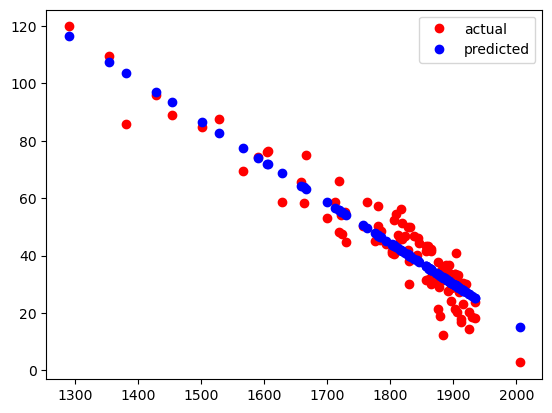

In [22]:
plt.plot(X,y,'ro',label='actual')
plt.plot(X,y_pred,'bo',label='predicted')
plt.legend()
plt.show()

## ln (C1) + C2/RT +C3*ln(strain)

In [24]:
force1.columns

Index(['Product Thickness', 'Pass Number', 'Core Temp (F)', 'Core Temp (K)',
       'Strain', 'Strain Rate', 'Flow Stress (Pa)', 'Meas FS (ksi)', 'ln(FS)',
       '1/RT', 'ln(Strain)', 'ln(Strain Rate)'],
      dtype='object')

In [40]:
# Define the Zener-Hollomon flow stress curve equation
def zener_holloman(c1,c2,c3,RT,strain):
    #RT = temperature * 8.314  # assuming gas constant R = 8.314 J/(mol*K)
    return c1*np.exp(c2*RT)*(strain ** c3)

# Define the objective function to minimize (using mean squared error)
def objective_function(coef,RT,strain,measured_values):
    predicted_values = zener_holloman(coef[0], coef[1],coef[2], RT,strain)
    return np.mean((predicted_values - measured_values) ** 2)

#strain = force1['Strain']
#strain_rate = force1['Strain Rate']
RT= force1['1/RT']
strain = force1['Strain']
measured_values = force1['Meas FS (ksi)']

# Initial guess for coefficients
#initial_guess = np.array([5684853.280812844,30600.773266375065,-0.14659341280912486,0.41966654801836967])
initial_guess = [1,1,1]


#5684853.280812844
#30600.773266375065
#-0.14659341280912486
#0.41966654801836967

# Bounds for coefficients
#bounds = [(10000, 200000000), (5000, 200000), (0, 1.1), (0, 1.1)]  

# Optimize the coefficients using scipy minimize function
result = minimize(objective_function, initial_guess, args=(RT,strain, measured_values),tol=1e-10)

# Extract optimized coefficients
optimized_coefs = result.x

# Print optimized coefficients
print("Optimized coefficients:", optimized_coefs)

# Compute predicted values using optimized coefficients
predicted_values = zener_holloman(optimized_coefs[0], optimized_coefs[1],optimized_coefs[2], RT,strain)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(measured_values, predicted_values))
print("RMSE:", rmse)

# Compute R^2
r2 = r2_score(measured_values, predicted_values)
print("R^2:", r2)


Optimized coefficients: [7.08028799e-01 4.42999676e+04 7.59688606e-02]
RMSE: 8.723095805724483
R^2: 0.8083696537362979


## Multiple Linear Regression

In [30]:
X=force1[['Core Temp (F)','Strain']].to_numpy()

In [31]:
y= force1['Meas FS (ksi)']
model.fit(X,y)

LinearRegression()

In [32]:
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9048512267204486


In [36]:
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

intercept: 297.3497961126766
coefficients: [-0.14274161 29.24756834]


In [34]:
y_pred = model.predict(X)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 11.96042488  22.47732476  21.49812943  25.83337083  23.50953775
  25.46668076  27.13740003  27.86465216  25.92743917  28.45110833
  24.68188171  27.77839915  26.31724917  27.68068675  27.51835814
  27.90954486  25.69388963  25.3936843   25.75309041  30.16683187
  29.55078459  29.8458247   30.8836305   25.86397769  26.04411019
  30.27379574  28.90258073  30.5569037   29.92074052  30.53982661
  33.81990811  31.38136233  30.57108594  31.76275514  33.64544527
  32.88756853  30.67054685  34.49022749  34.30969616  31.13552947
  29.33415462  33.40223388  34.95764439  29.83695626  33.73722992
  33.05983313  31.15704395  35.24608955  36.82660001  36.60840595
  39.46889766  36.30659236  36.27985653  38.07102579  37.84446388
  38.15455828  38.60519944  39.89270412  34.0594732   41.08540818
  38.6003032   39.86000421  36.54546589  43.52067119  36.60094979
  36.54305993  42.16747028  42.79753455  42.457982    44.86531464
  44.0356486   40.05742193  43.3167835   44.33055234  46

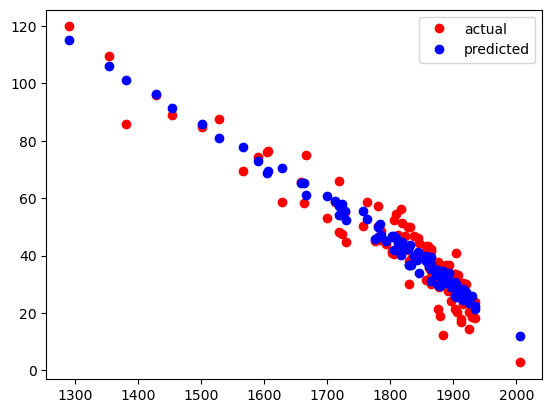

In [37]:
plt.plot(force1['Core Temp (F)'],y,'ro',label='actual')
plt.plot(force1['Core Temp (F)'],y_pred,'bo',label='predicted')
plt.legend()
plt.show()

## ln (C1) + C2/RT +C4*ln(strain rate)

In [41]:
# Define the Zener-Hollomon flow stress curve equation
def zener_holloman(c1,c2,c4,RT,strain_rate):
    #RT = temperature * 8.314  # assuming gas constant R = 8.314 J/(mol*K)
    return c1*np.exp(c2*RT)*(strain_rate ** c4)

# Define the objective function to minimize (using mean squared error)
def objective_function(coef,RT,strain_rate,measured_values):
    predicted_values = zener_holloman(coef[0], coef[1],coef[2], RT,strain_rate)
    return np.mean((predicted_values - measured_values) ** 2)

#strain = force1['Strain']
#strain_rate = force1['Strain Rate']
RT= force1['1/RT']
strain_rate = force1['Strain Rate']
measured_values = force1['Meas FS (ksi)']

# Initial guess for coefficients
#initial_guess = np.array([5684853.280812844,30600.773266375065,-0.14659341280912486,0.41966654801836967])
initial_guess = [1,1,1]


#5684853.280812844
#30600.773266375065
#-0.14659341280912486
#0.41966654801836967

# Bounds for coefficients
#bounds = [(10000, 200000000), (5000, 200000), (0, 1.1), (0, 1.1)]  

# Optimize the coefficients using scipy minimize function
result = minimize(objective_function, initial_guess, args=(RT, strain_rate, measured_values),tol=1e-10)

# Extract optimized coefficients
optimized_coefs = result.x

# Print optimized coefficients
print("Optimized coefficients:", optimized_coefs)

# Compute predicted values using optimized coefficients
predicted_values = zener_holloman(optimized_coefs[0], optimized_coefs[1],optimized_coefs[2], RT,strain_rate)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(measured_values, predicted_values))
print("RMSE:", rmse)

# Compute R^2
r2 = r2_score(measured_values, predicted_values)
print("R^2:", r2)


Optimized coefficients: [1.09951520e+00 3.46741872e+04 2.09772211e-01]
RMSE: 7.214098406419801
R^2: 0.8689348816614892


## Multiple Linear Regression

In [43]:
X=force1[['Core Temp (F)','Strain Rate']].to_numpy()

In [44]:
y= force1['Meas FS (ksi)']
model.fit(X,y)

LinearRegression()

In [45]:
r_sq = model.score(X, y)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.9106415658884466


In [46]:
print(f"intercept: {model.intercept_}")
print(f"coefficients: {model.coef_}")

intercept: 263.311897772723
coefficients: [-0.12469333  1.02461118]


In [47]:
y_pred = model.predict(X)
print(f"predicted response:\n{y_pred}")

predicted response:
[ 14.14367108  24.25897521  22.81429855  25.33470215  24.78108256
  25.62797441  27.28850403  26.93492938  26.93890113  27.83978332
  26.05537867  27.33011601  26.71874661  27.43139126  27.4843054
  27.79811663  26.93511392  26.24895591  26.89689909  30.04427021
  29.29500872  28.99262801  27.79272863  26.44805478  26.84406927
  28.7058192   28.87216096  29.72639059  29.51189816  30.67806422
  32.70443663  29.87539005  30.2015085   31.11647619  33.5444423
  32.46264657  30.45391883  32.14997603  32.55632209  32.22260562
  29.91630871  32.1222381   32.69735226  30.1299454   32.82745855
  33.68480714  30.95501987  35.14086334  34.98413145  35.87897938
  38.3902781   34.03190061  39.57963173  36.18203318  37.71838683
  33.62861904  42.72188421  38.20084959  33.89086752  39.95162092
  37.42051596  38.83853211  36.51137918  43.98866687  36.41049722
  36.26464618  41.46944786  42.75320517  40.73304752  46.25487688
  46.58299004  43.67603792  41.89567707  42.94753489  47.7

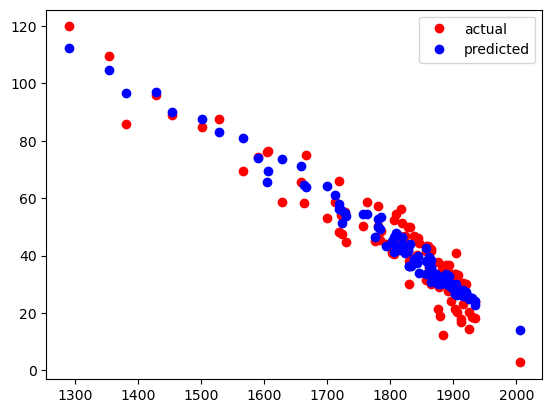

In [48]:
plt.plot(force1['Core Temp (F)'],y,'ro',label='actual')
plt.plot(force1['Core Temp (F)'],y_pred,'bo',label='predicted')
plt.legend()
plt.show()

### For the variations, $ln(C1) + C2/RT + C4 * ln(strain_rate)$, yields the best result correlation-wise.

-Optimizer : $R^2 =86.8%$

-Linear Regression : $R^2 = 91%$